In [339]:
## import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [340]:
df=pd.read_csv('/content/gurgaon_property_real_estate_data_after_featureselection')
df.head()

,Property_type,sector,bedRoom,bathroom,balcony,agePossession,Built_Up_area,Servant Room,Store Room,furnish_type,luxury_category,floor_category,price
0,0.0,79.0,2.0,2.0,2.0,3.0,1013.0,0,0,1,1.0,2.0,0.45
1,0.0,34.0,2.0,2.0,2.0,2.0,731.0,0,0,1,1.0,1.0,0.50
2,0.0,111.0,2.0,2.0,1.0,1.0,669.0,0,0,0,1.0,0.0,0.40
3,0.0,69.0,2.0,2.0,1.0,1.0,1350.0,0,0,0,2.0,1.0,1.47
4,0.0,105.0,2.0,2.0,4.0,4.0,1210.0,0,0,0,1.0,2.0,0.70


In [341]:
df['Property_type'].unique()

array([0., 1.])

In [342]:
df[['sector','balcony','agePossession','luxury_category','floor_category','Property_type']]=df[['sector','balcony','agePossession','luxury_category','floor_category','Property_type']].astype(int)

In [343]:
df[['Servant Room','Store Room','furnish_type']]=df[['Servant Room','Store Room','furnish_type']].astype('float')

In [344]:
df.head()

,Property_type,sector,bedRoom,bathroom,balcony,agePossession,Built_Up_area,Servant Room,Store Room,furnish_type,luxury_category,floor_category,price
0,0,79,2.0,2.0,2,3,1013.0,0.0,0.0,1.0,1,2,0.45
1,0,34,2.0,2.0,2,2,731.0,0.0,0.0,1.0,1,1,0.50
2,0,111,2.0,2.0,1,1,669.0,0.0,0.0,0.0,1,0,0.40
3,0,69,2.0,2.0,1,1,1350.0,0.0,0.0,0.0,2,1,1.47
4,0,105,2.0,2.0,4,4,1210.0,0.0,0.0,0.0,1,2,0.70


In [345]:
df.isna().sum()

,0
Property_type,0
sector,0
bedRoom,0
bathroom,0
balcony,0
agePossession,0
Built_Up_area,0
Servant Room,0
Store Room,0
furnish_type,0


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Property_type    3550 non-null   int64  
 1   sector           3550 non-null   int64  
 2   bedRoom          3550 non-null   float64
 3   bathroom         3550 non-null   float64
 4   balcony          3550 non-null   int64  
 5   agePossession    3550 non-null   int64  
 6   Built_Up_area    3550 non-null   float64
 7   Servant Room     3550 non-null   float64
 8   Store Room       3550 non-null   float64
 9   furnish_type     3550 non-null   float64
 10  luxury_category  3550 non-null   int64  
 11  floor_category   3550 non-null   int64  
 12  price            3550 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 360.7 KB


<Axes: xlabel='price', ylabel='Count'>

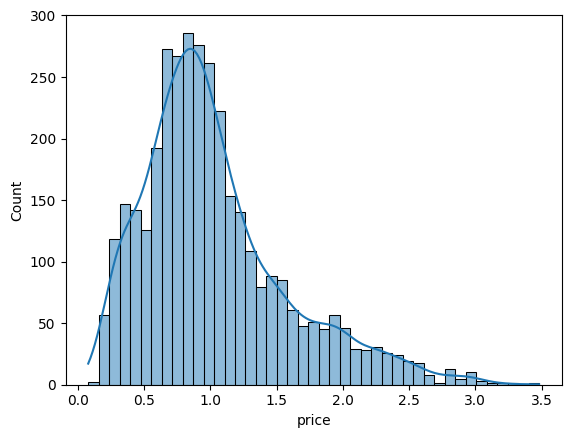

In [347]:
sns.histplot(np.log1p(df['price']),kde=True)

<Axes: xlabel='price', ylabel='Count'>

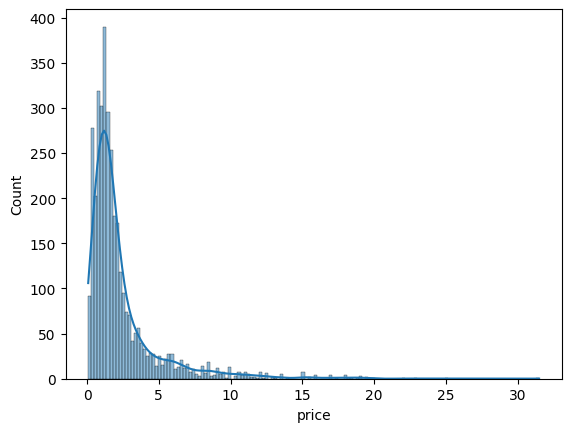

In [348]:
sns.histplot(df['price'],kde=True)

#` we have to do there things before implementing baseline model`
- `one hot encoding - because we have done ordinal encoding in feature selection `

- `standardization - so that all values should have same range`

- `As over price column(output column) is right skewed then we have to do log of it make it more normally dist.`

In [349]:
df.columns

Index(['Property_type', 'sector', 'bedRoom', 'bathroom', 'balcony',
       'agePossession', 'Built_Up_area', 'Servant Room', 'Store Room',
       'furnish_type', 'luxury_category', 'floor_category', 'price'],
      dtype='object')

In [350]:
X=df.drop(columns=['price'])
y=df['price']

In [351]:
## Applying log transformation to price column
y_transformed=np.log1p(y)

In [352]:
y_transformed[10:20]

,price
10,0.672944
11,0.254642
12,0.854415
13,0.667829
14,0.530628
15,1.599388
16,0.641854
17,0.717840
18,1.163151
19,0.698135


In [353]:
df.columns

Index(['Property_type', 'sector', 'bedRoom', 'bathroom', 'balcony',
       'agePossession', 'Built_Up_area', 'Servant Room', 'Store Room',
       'furnish_type', 'luxury_category', 'floor_category', 'price'],
      dtype='object')

In [354]:
df['Servant Room'].unique()

array([0., 1.])

In [355]:
numerical_features = ['bedRoom', 'bathroom', 'Built_Up_area', 'Servant Room', 'Store Room', 'Property_type']
categorical_features = ['sector', 'balcony', 'agePossession', 'furnish_type', 'luxury_category', 'floor_category']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(X[categorical_features])

# Check the shape of encoded_cats to ensure the number of columns matches the expected output
print(encoded_cats.shape)

# Create the column names based on the encoder
encoded_columns = encoder.get_feature_names_out(categorical_features)

# Convert the result to a DataFrame, ensuring the number of columns match
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_columns)
# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Concatenate the transformed numerical and encoded categorical columns
X_transformed = pd.concat([X[numerical_features], encoded_df], axis=1)

# Now, X_transformed should have the correct shape
print(X_transformed.shape)
from sklearn.svm import SVR
svr=SVR(kernel='rbf')

(3550, 126)
(3550, 132)


In [356]:
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(svr,X_transformed,y_transformed, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))

training_data 0.8746726749894023


In [357]:
print('training_data',np.std(cv_scores))

training_data 0.010896750882679048


In [358]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y_transformed,test_size=0.2,random_state=42)

In [359]:
svr.fit(X_train,y_train)

SVR()

In [360]:
y_pred=svr.predict(X_test)

In [361]:
y_pred=np.expm1(y_pred)

In [362]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.49260796685300406

In [363]:
kfold1 = KFold(n_splits=20, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(svr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=20, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(svr, X_test, y_test, cv=kfold2, scoring='r2')
print('testing_data',np.mean(cv_score))

training_data 0.8635988759387058
testing_data 0.785262774842443


In [364]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(random_state=42)

In [365]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [366]:
y_pred1=gbr.predict(X_test)

In [367]:
y_pred1=np.expm1(y_pred1)

In [368]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred1)

0.5685551664392251

In [369]:
kfold1 = KFold(n_splits=20, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(gbr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=20, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(gbr, X_test, y_test, cv=kfold2, scoring='r2')
print('testing_data',np.mean(cv_score))

training_data 0.8451615696411026
testing_data 0.7847139454166407


In [370]:
from sklearn.ensemble import RandomForestRegressor

In [371]:
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [372]:
y_pred2=rfr.predict(X_test)

In [373]:
y_pred2=np.expm1(y_pred2)

In [374]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred2)

0.49863241299704353

In [375]:
kfold1 = KFold(n_splits=20, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(rfr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=20, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(rfr, X_test, y_test, cv=kfold2, scoring='r2')
print('testing_data',np.mean(cv_score))

training_data 0.8537297841635867
testing_data 0.7572556055026456


##`Our baseline model are goood`